# Supervised Learning Assignemnt

In [1]:
#Importing libraries and dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

Overview of the dataset - 14 COlumns, 5000 Rows, No Missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Age Column - Close to Normal Distribution

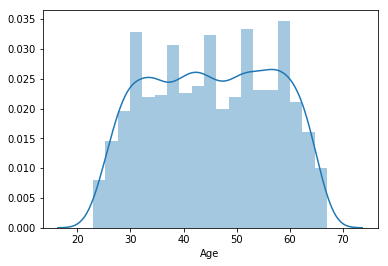

In [6]:
sns.distplot(df['Age'])

Experience Column - There are values less than 0 which is practically not Possible and needs to be capped at 0 

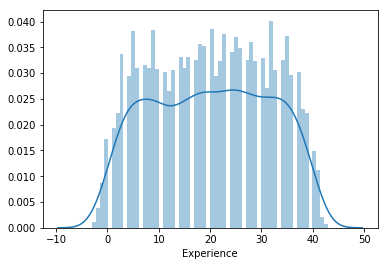

In [7]:
sns.distplot(df['Experience'], bins=60)

In [8]:
df.loc[(df['Experience'] <= 0), 'Experience' ] = 0

Income Column - Income distribution is right Skewed

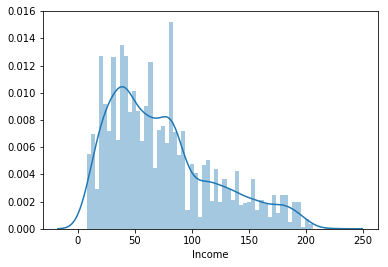

In [9]:
sns.distplot(df['Income'], bins= 60)

ZIP Code Column - 45 unique values of Zipcodes which needs to be label encoded

In [10]:
df['ZIP Code'].value_counts().unique()

array([169, 127, 116,  71,  57,  54,  53,  52,  51,  50,  46,  45,  37,
        34,  32,  31,  30,  29,  27,  26,  25,  24,  23,  22,  21,  20,
        19,  18,  17,  16,  15,  14,  13,  12,  11,  10,   9,   8,   7,
         6,   5,   4,   3,   2,   1], dtype=int64)

In [11]:
from sklearn import preprocessing 
  

label_encoder = preprocessing.LabelEncoder() 
  

df['ZIP Code']= label_encoder.fit_transform(df['ZIP Code'])

Family Column - 3 member families are slightly lesser than 1,2 and 4 member families

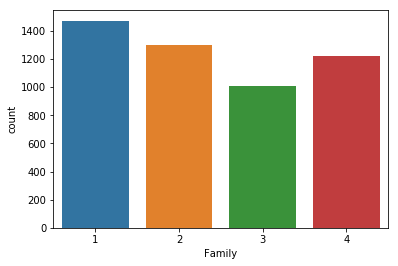

In [12]:
sns.countplot(df['Family'])

CCAvg Column - Right skewed

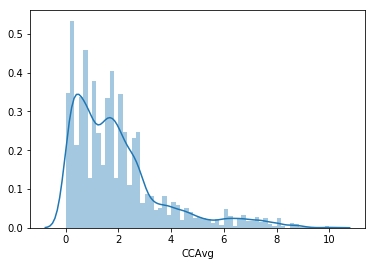

In [13]:
sns.distplot(df['CCAvg'], bins= 60)

Education Column - More undergrads are appliyign for loans than graduates and proffesionals

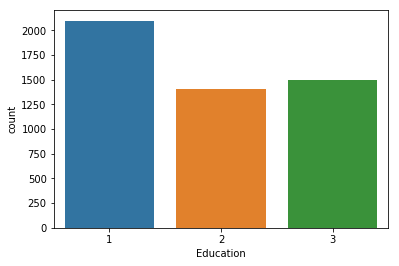

In [14]:
sns.countplot(df['Education'])

Mortgage Column - 

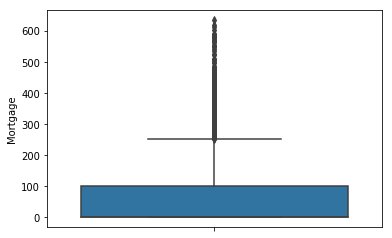

In [15]:
sns.boxplot(df['Mortgage'],orient = 'v')

Securites Account column - Most people dont have a securities account with the bank

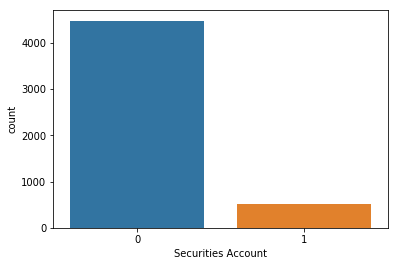

In [16]:
sns.countplot(df['Securities Account'] )

CD Account Column - Most people dont have a securities account with the bank

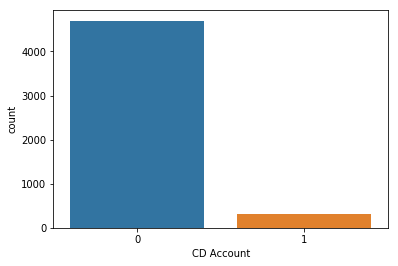

In [17]:
sns.countplot(df['CD Account'] )

Online Column - Most people are using the internet banking Facility

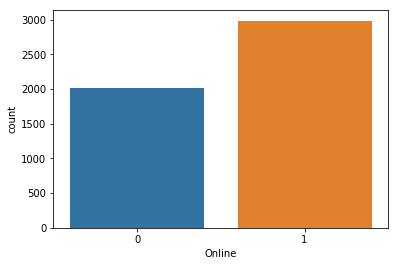

In [18]:
sns.countplot(df['Online'] )

CreditCard Column - Most people dont use the credit card issued by this bank

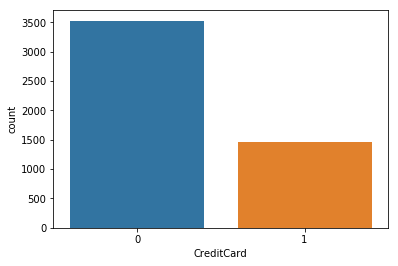

In [19]:
sns.countplot(df['CreditCard'] )

Personal Loan Column - Only few(9.6%) people accepted the personal loan of previous campaign

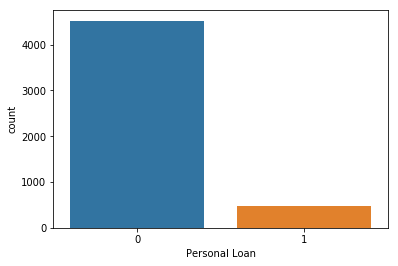

In [20]:
sns.countplot(df['Personal Loan'])

#Preparing the Data

In [21]:
X = df.drop(['Personal Loan', 'ID'],axis=1)     
Y = df['Personal Loan']

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

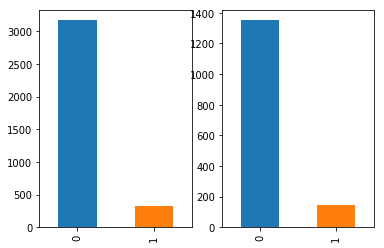

In [23]:
plt.subplot(1,2,1)
y_train.value_counts().plot(kind = 'bar')

plt.subplot(1,2,2)
y_test.value_counts().plot(kind = 'bar')
plt.show()

Logistic regression

In [43]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(x_train, y_train)

y_predict_lr= model_lr.predict(x_test)


Accuracy of Logistic regression model is 94.53333333333333%


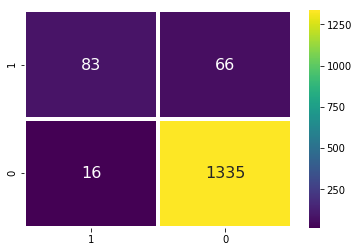

In [66]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

cm_lr = metrics.confusion_matrix(y_test, y_predict_lr,labels=[1,0])
sns.heatmap(cm_lr, annot= True, yticklabels = [1,0], xticklabels = [1,0], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g')

print("")

print("Accuracy of Logistic regression model is {}%".format(accuracy_score(y_test, y_predict_lr)*100))

Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()

model_NB.fit(x_train, y_train)

y_predict_NB= model_NB.predict(x_test)


Accuracy of Naive Bayes model is 87.46666666666667%


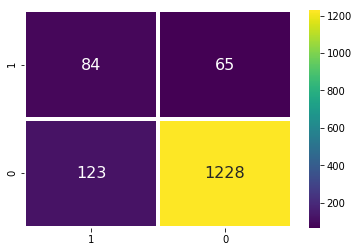

In [65]:
cm_NB = metrics.confusion_matrix(y_test, y_predict_NB,labels=[1,0])
sns.heatmap(cm_NB, annot= True, yticklabels = [1,0], xticklabels = [1,0], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g')

print("")

print("Accuracy of Naive Bayes model is {}%".format(accuracy_score(y_test, y_predict_NB)*100))

K-Nearest Neighbours

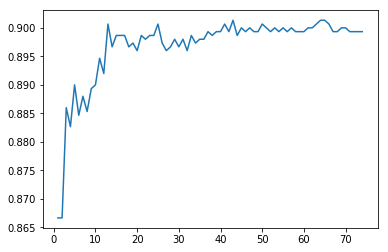

In [47]:
#checking what value of 'K' gives the highest accuracy on the testing dataset
from sklearn.neighbors import KNeighborsClassifier
scores =[]
for k in range(1,75):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(x_train, y_train)
    scores.append(NNH.score(x_test, y_test))

plt.plot(range(1,75),scores)

In [48]:
model_KNN = KNeighborsClassifier(n_neighbors = 13)

model_KNN.fit(x_train, y_train)

y_predict_KNN= model_KNN.predict(x_test)

Accuracy of K-Nearest Neighbours model is 90.2%


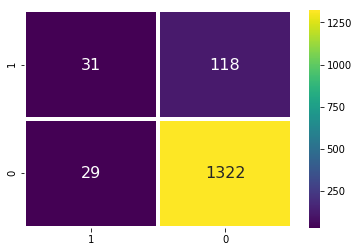

In [64]:
cm_knn = metrics.confusion_matrix(y_test, y_predict_KNN,labels=[1,0])
sns.heatmap(cm_knn, annot= True, yticklabels = [1,0], xticklabels = [1,0], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g')



print("Accuracy of K-Nearest Neighbours model is {}%".format(accuracy_score(y_test, y_predict_KNN)*100))

Support Vector Machine

In [50]:
from sklearn.svm import SVC

model_SVM = SVC(kernel= 'linear', probability = True)

model_SVM.fit(x_train, y_train)

y_predict_SVM= model_SVM.predict(x_test)


Accuracy of Support Vector Machine model is 94.66666666666667%


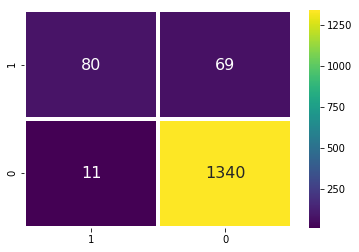

In [67]:
cm_svm = metrics.confusion_matrix(y_test, y_predict_SVM,labels=[1,0])
sns.heatmap(cm_svm, annot= True, yticklabels = [1,0], xticklabels = [1,0], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g')

print("")

print("Accuracy of Support Vector Machine model is {}%".format(accuracy_score(y_test, y_predict_SVM)*100))

#Model Evaluation

In [33]:
probas_lr = model_lr.fit(x_train, y_train).predict_proba(x_test)
probas_nb = model_NB.fit(x_train, y_train).predict_proba(x_test)
probas_knn = model_KNN.fit(x_train, y_train).predict_proba(x_test)
probas_svm = model_SVM.fit(x_train, y_train).predict_proba(x_test)

In [34]:
from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probas_lr[:, 1])
auc_lr = auc(fpr_lr, tpr_lr)
print("Area under the Logistic Regression ROC curve : %f" % auc_lr)

Area under the Logistic Regression ROC curve : 0.952479


In [35]:
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, probas_nb[:, 1])
auc_nb = auc(fpr_nb, tpr_nb)
print("Area under the Naive bayes ROC curve : %f" % auc_nb)

Area under the Naive bayes ROC curve : 0.915161


In [36]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, probas_knn[:, 1])
auc_knn = auc(fpr_knn, tpr_knn)
print("Area under the K-Nearest Neighbours ROC curve : %f" % auc_knn)

Area under the K-Nearest Neighbours ROC curve : 0.880275


In [37]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, probas_svm[:, 1])
auc_svm = auc(fpr_svm, tpr_svm)
print("Area under the Support Vector Machine ROC curve : %f" % auc_svm)

Area under the Support Vector Machine ROC curve : 0.952697


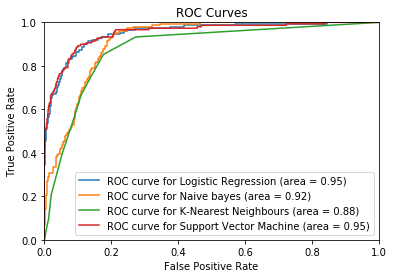

In [38]:
import pylab as pl

pl.clf()
pl.plot(fpr_lr, tpr_lr, label='ROC curve for Logistic Regression (area = %0.2f)' % auc_lr)
pl.plot(fpr_nb, tpr_nb, label='ROC curve for Naive bayes (area = %0.2f)' % auc_nb)
pl.plot(fpr_knn, tpr_knn, label='ROC curve for K-Nearest Neighbours (area = %0.2f)' % auc_knn)
pl.plot(fpr_svm, tpr_svm, label='ROC curve for Support Vector Machine (area = %0.2f)' % auc_svm)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC Curves')
pl.legend(loc="lower right")
pl.show()